与数据集相关的包
- from torchvision import datasets, transforms
- import matplotlib.pyplot as plt
- from torch.utils.data import DataLoader, Dataset

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from PIL import Image

## 从文件夹中加载数据

In [2]:
data_transforms = {
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(48),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val':
    transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(48),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

root = "F:/jupyter/Pytorch/pytorch-handbook/chapter3/data/MNIST100000_init/"
image_datasets = {
    x: datasets.ImageFolder(os.path.join(root, x), data_transforms[x])
    for x in ['train', 'val']
}

dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x],
        batch_size=16,  # 批次大小
        shuffle=True,  # 将数据打乱
        num_workers=4)
    for x in ['train', 'val']
}

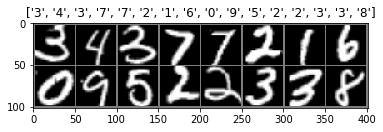

In [3]:
# 可视化
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

for inputs, classes in dataloaders["val"]:
    break
    
class_names = image_datasets['train'].classes  # 数据集的每个类的名称
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])


## 从创建自己的数据集开始


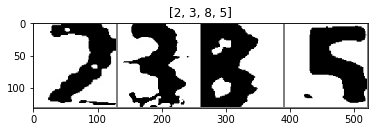

In [21]:
class My_DataSet(Dataset):
    def __init__(self, path, transform=None):
        super(My_DataSet, self).__init__()
        self.path = path
        tree_file = [i for i in os.walk(path)][1:]
        self.img_list = []
        for cls in tree_file:
            self.img_list += [cls[0] + "/" + i for i in cls[-1]]
        self.transform = transform

    def __getitem__(self, index):
        item = self.img_list[index]
        label = item.split("/")[-2]
        img = (Image.open(item))
        if self.transform is not None:
            img = self.transform(img)
        return img, int(label)  # 得到的是字符串，故要进行类型转换

    def __len__(self):
        return len(self.img_list)


mean = [0.5]
std = [0.5]
data_transforms = {
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(128),
        transforms.RandomAffine(degrees=(1.0, 3.0), translate=(0.1, 0.2)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val':
    transforms.Compose([
        transforms.Resize(160),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

train_dataSet = My_DataSet("E:/wood/training_data/train/",
                           transform=data_transforms["train"])
train_dataSet_loader = DataLoader(train_dataSet, batch_size=4, shuffle=True)

test_dataSet = My_DataSet("E:/wood/training_data/val/",
                          transform=data_transforms["val"])
test_dataSet_loader = DataLoader(test_dataSet, batch_size=4, shuffle=True)

# 可视化
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

for inputs, classes in test_dataSet_loader:
    break
    
out = torchvision.utils.make_grid(inputs)
imshow(out, title=list(classes.numpy()))